<a href="https://colab.research.google.com/github/sungrae98/Machine-Learning/blob/main/06_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 다중회귀분석 이용, 집 값 예측

import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"

pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
raw = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [ ]:
df = raw.copy()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
df.shape

(1012, 11)

In [ ]:
df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [3.9690e+02, 4.9800e+00, 2.4000e+01, ...,        nan,        nan,
               nan],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [3.9345e+02, 6.4800e+00, 2.2000e+01, ...,        nan,        nan,
               nan],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [3.9690e+02, 7.8800e+00, 1.1900e+01, ...,        nan,        nan,
               nan]])

In [ ]:
df.values[::2, :]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01]])

In [ ]:
df.values[1::2, :2]

array([[396.9 ,   4.98],
       [396.9 ,   9.14],
       [392.83,   4.03],
       ...,
       [396.9 ,   5.64],
       [393.45,   6.48],
       [396.9 ,   7.88]])

In [ ]:
np.hstack([df.values[::2, :], df.values[1::2, :2]])
# np.hstack(): h(horizontal) 주어진 배열을 수평 결홥 >> 새로운 배열 생성

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])

In [ ]:
df.values[1::2, 2]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
target = df.values[1::2, 2]

In [ ]:
from sklearn.model_selection import train_test_split

x = data
y = target

x_train,x_test,y_train,y_test=\
train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형 회귀모형
lr = LinearRegression()

In [ ]:
# 훈련 (train_data만 사용)
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.predict(x_test)

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [ ]:
pred = lr.predict(x_test)

In [ ]:
lr.score(x_train, y_train)

0.7434997532004697

In [ ]:
lr.score(x_test, y_test)

0.7112260057484889

In [ ]:
# 모형 설명력
# 결정 계수 (0 <= r^2 <= 1)

from sklearn.metrics import r2_score

r2_score(y_test, pred)
# y_test(실데이터), pred(예측 데이터) 비교
# r2 score 0.711 >> 71.1% 모델로 데이터 설명 가

0.7112260057484889

In [ ]:
# 평균제곱오차 (MSE : Mean Squared Error)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

21.51744423117753

In [ ]:
# RMSE

import math

math.sqrt(mse)

4.638689926172855

statsmodels

In [ ]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston

<class 'statsmodels.datasets.utils.Dataset'>

In [ ]:
boston.data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df = boston.data
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
df.shape

(506, 14)

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.iloc[:, :-1].columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

formula = 'medv ~ ' + '+'.join(df.iloc[:, :-1].columns)
formula

'medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [ ]:
df_boston = smf.ols(formula=formula, data=df).fit()

In [ ]:
df_boston.summary() # summary : pandas 의 describe()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          6.72e-135
Time:                        10:40:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula

'medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [ ]:
formula_mod = 'medv ~ crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'

In [ ]:
df_boston2 = smf.ols(formula=formula_mod,data=df).fit()

In [ ]:
df_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          5.54e-137
Time:                        10:53:38   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula_mod

'medv ~ crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'

In [ ]:
formula_final = 'medv ~ rm+rad+chas -1'
# -1 : 절편(intercept)을 제외하고 독립변수들만 모델에 포함하겠다는 의미

df_boston_final = smf.ols(formula=formula_final, data=df).fit()

In [ ]:
df_boston_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              2001.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):                   4.51e-279
Time:                        10:53:52   Log-Likelihood:                         -1685.5
No. Observations:                 506   AIC:                                      3377.
Df Residuals:                     503   BIC:                                      3390.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             4.1415      0.070     59.138      0.000       4.004       4.279
rad           -0.3699      0.034    -11.005      0.000      -0.436      -0.304
chas           4.8841      1.192      4.098      0.000       2.542       7.226
==============================================================================
Omnibus:                      180.588   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.576
Skew:                           1.623   Prob(JB):                    3.61e-144
Kurtosis:                       7.560   Cond. No.                         54.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
1. r2_score : 0.923 >> 92.3% 데이터를 회귀모형이 설명함
2. rad + rm + chas (p_value = 0.000) < alpha (0.05)
>> 통계적으로 유의한 영향을 미침
3. Durbin-Watson : 0.707 (2에 가까울수록 자기 상관 없음)
>> 0(+) ~ 4(-) 자기상관
'''

'\n1. r2_score : 0.923 >> 92.3% 데이터를 회귀모형이 설명함\n2. rad + rm + chas (p_value = 0.000) < alpha (0.05)\n>> 통계적으로 유의한 영향을 미침\n3. Durbin-Watson : 0.707 (2에 가까울수록 자기 상관 없음)\n>> 0(+) ~ 4(-) 자기상관\n'

잔차의 정규성 검증

In [ ]:
df_boston_final.predict(df)

0      26.860682
1      25.853001
2      29.017131
3      27.872780
4      28.489868
         ...    
501    26.935230
502    24.976286
503    28.521436
504    27.767678
505    24.603548
Length: 506, dtype: float64

In [ ]:
y_pred = df_boston_final.predict(df)

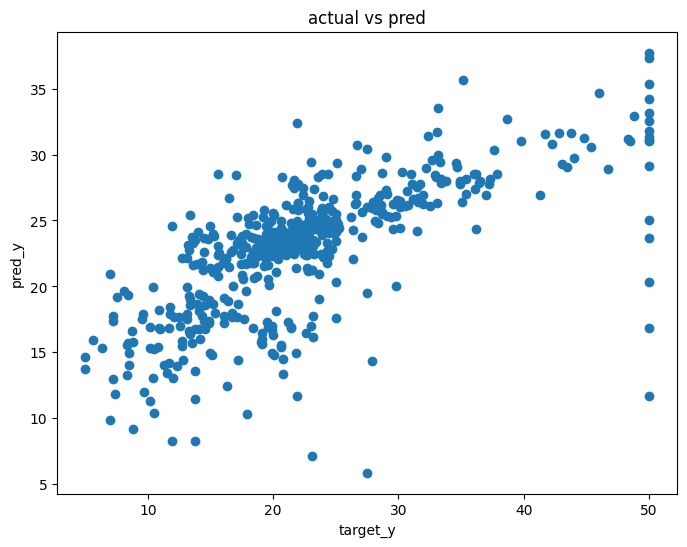

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))

plt.scatter(df.iloc[:, -1], y_pred)
plt.xlabel('target_y')
plt.ylabel('pred_y')
plt.title("actual vs pred")
plt.show()

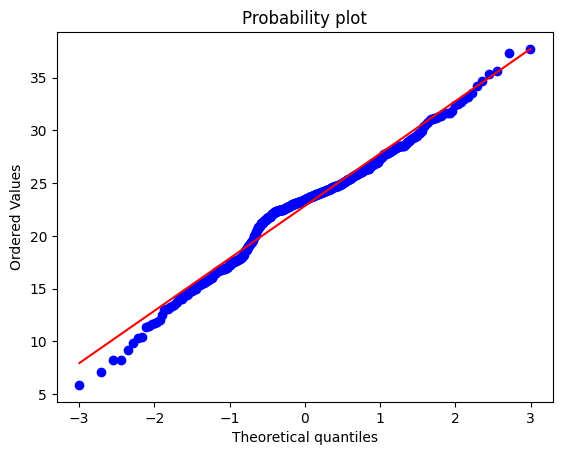

In [ ]:
# 잔차의 정규성(qq plot)

from scipy import stats

fig = plt.figure()
stats.probplot(y_pred, plot=plt)

plt.title("Probability plot")
plt.show()

VIF(다중공선성 유뮤 확인)

In [ ]:
# VIF 10 이상이거나 공차한계 0.1 이하 일 경우에는 공선성이 존재한다고 평가함

import statsmodels.api as sm

boston = sm.datasets.get_rdataset('Boston', package="MASS")

In [ ]:
boston.data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston = boston.data

In [ ]:
boston[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
formula = 'medv~'+ '+'.join(boston.columns[:-1])

In [ ]:
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [ ]:
# dmatrices

from patsy import dmatrices

y, x = dmatrices(formula, boston, return_type='dataframe')

In [ ]:
print(y)
print()
print(x)

     medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

     Intercept     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0          1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1          1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2          1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3          1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4          1.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..         ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501        1.0  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502        1.0  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503        1.0  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504        1.0  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2

In [ ]:
x.shape, y.shape

((506, 14), (506, 1))

In [ ]:
x.shape[0]

506

In [ ]:
x.shape[1]

14

In [ ]:
import pandas as pd

vif = pd.DataFrame()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x.columns

Index(['Intercept', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [ ]:
x.values

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
vif['features'] = x.columns

In [ ]:
variance_inflation_factor(x.values)

In [ ]:
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif

,features,VIF
0,Intercept,585.265238
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


In [ ]:
# vif factor 기준, 값을 내림차순으로 정렬하기

vif.sort_values(by='VIF', ascending=False, inplace=True)
# sort_values() (default: 오름차순)

In [ ]:
vif

,features,VIF
0,Intercept,585.265238
10,tax,9.008554
9,rad,7.484496
5,nox,4.393720
3,indus,3.991596
8,dis,3.955945
7,age,3.100826
13,lstat,2.941491
2,zn,2.298758
6,rm,1.933744


In [ ]:
def get_vif(formular, df):
  from patsy import dmatrices
  y, x = dmatrices(formula, df, return_type='dataframe')
  import pandas as pd
  vif = pd.DataFrame()
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  vif['features'] = x.columns
  vif['VIF factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  vif.sort_values(by='VIF factor', ascending=False, inplace=True)
  return vif

In [ ]:
vif

,features,VIF
0,Intercept,585.265238
10,tax,9.008554
9,rad,7.484496
5,nox,4.393720
3,indus,3.991596
8,dis,3.955945
7,age,3.100826
13,lstat,2.941491
2,zn,2.298758
6,rm,1.933744
